# Hi!

I'm **Rizky Anshari**,
This notebook is my form of evaluation.

Please take a look and learn.

# Background
Uber and Lyft are two very similar services. Both are "ride-sharing" apps that you can use on your phone to get a ride from a driver who is driving their own car. Travel using this mode is in great demand because it provides a wide selection of vehicles and can be used in almost every part of the city. The price of travel using this mode of transport has varied at some times.

# The Objective
In this uber and lyft dataset, we will test each variable that affects the price of uber and lyft so that we can find out the variables on which the rise and fall of travel prices on uber and lyft are based.

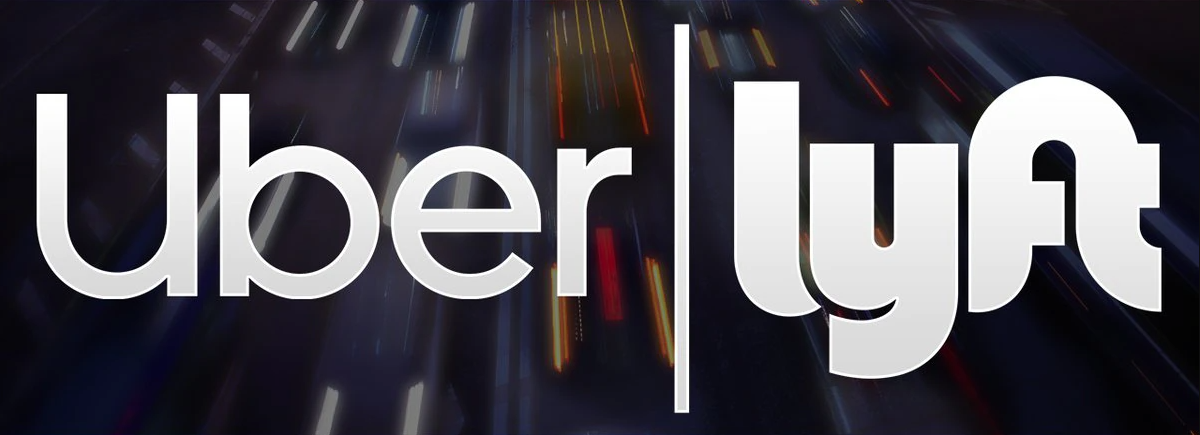

In [3]:
Image(filename='uber and lyft.png') 

# A. Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# B.Data Loading

In [4]:
df = pd.read_csv('Uber_and_lyft_predicting_travel_prices.csv')

In [5]:
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [6]:
df.shape

(693071, 57)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
# Show the Category column 
df_category = df.select_dtypes("object")
df_category.head()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


# C. Data Cleaning

In [9]:
# checking massing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

found that there is 55095 null data in the price column.

In [10]:
nulls = pd.DataFrame(df.isnull().sum(), columns=["nulls"]) # Total null data 
nulls["null percentage"] = nulls["nulls"]/df.shape[0]*100 # enter percentage 
nulls[nulls["nulls"] > 0]

,nulls,null percentage
price,55095,7.949402


The percentage of null data in the price column is 7.9%.
This data will be dropped with consideration because the price column is the target and if it is filled, it will change the actual data result.

In [11]:
df = df.dropna(axis=0) # drop null column

In [12]:
df.reset_index(drop=True) #reset index

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637972,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637973,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637974,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [13]:
df.isnull().sum().sum() # sum and checking null again

0

In [14]:
df.shape # size after drop data

(637976, 57)

In [15]:
df.duplicated().sum() # checking duplicate data

0

# D. Short Exploratory Data Analysis

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,637976.0,1.544046e+09,689202.790112,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,637976.0,1.779767e+01,9.982083,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,637976.0,1.158655e+01,0.492452,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
surge_multiplier,637976.0,1.015068e+00,0.095422,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,637976.0,4.233816e+01,0.047856,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,637976.0,-7.106614e+01,0.020303,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


It seems that there are no anomalies in this dataset.

In [17]:
df.corr().style.background_gradient() # correlation of each numeric column with the price column

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,-0.226472,-0.179834,-0.147351,-0.167740,-0.066364,0.005565,0.998843,0.158577,-0.228324,0.999332,-0.366885,0.999175,-0.215550,0.999312,-0.402043,0.999204,-0.265512,0.533074,-0.133853,-0.081522,-0.025986,0.158577,0.196566,0.999372,0.999372,-0.846279,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,0

The table displays price-related features. There are only 2 columns, namely the distance column and the surge multiplier column.

In [18]:
cat_corr = pd.get_dummies(df[['price', 'source', 'destination', 'cab_type', 'name', 'short_summary']]).corr()
cat_corr.style.background_gradient() # korelasi setiap kolom category dengan price

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
price,1.000000,-0.016101,-0.028396,0.074634,0.059317,0.053468,-0.095924,-0.045006,-0.005821,0.043847,-0.028216,0.001678,-0.014092,-0.010834,-0.009565,0.077515,0.051780,0.049051,-0.074040,-0.049891,0.008360,0.041467,-0.055504,-0.018458,-0.010306,0.083385,-0.083385,0.131185,0.453096,0.038857,0.206544,0.500057,-0.219756,-0.039163,-0.333235,-0.256930,-0.223551,-0.028587,-0.223557,-0.002387,-0.000480,-0.000052,0.000508,0.002734,-0.000729,0.000350,-0.001137,-0.000104
source_Back Bay,-0.016101,1.000000,-0.090641,-0.090950,-0.090944,-0.091903,-0.090926,-0.090949,-0.090393,-0.090942,-0.090939,-0.090977,-0.090771,-0.090967,-0.090640,0.087136,0.087887,-0.091898,0.090336,0.102169,-0.090394,0.090084,0.088027,-0.090966,-0.090782,0.000229,-0.000229,-0.000068,-0.000070,0.000073,0.000073,0.000073,0.000073,0.000073,0.000056,-0.000062,-0.000067,-0.000070,-0.000070,-0.000300,0.001399,0.001078,0.001025,-0.001342,0.002156,-0.002511,-0.000151,0.000552
source_Beacon Hill,-0.028396,-0.090641,1.000000,-0.090614,-0.090608,-0.091563,-0.090590,-0.090613,-0.090059,-0.090606,-0.090603,-0.090641,-0.090435,-0.090630,-0.090305,0.084072,0.088158,-0.091559,0.090492,0.099522,-0.090059,0.092852,0.088525,-0.090629,-0.090446,0.000030,-0.000030,-0.000006,-0.000008,0.000009,0.000009,0.000009,0.000009,0.000009,0.000012,-0.000020,-0.000004,-0.000008,-0.000008,-0.001102,-0.001225,0.005182,0.001649,0.001009,-0.001928,0.000406,-0.001568,0.000218
source_Boston University,0.074634,-0.090950,-0.090614,1.000000,-0.090917,-0.091876,-0.090899,-0.090922,-0.090366,-0.090915,-0.090912,-0.090950,-0.090744,0.087160,0.083949,-0.090922,-0.090917,0.089974,-0.090922,-0.090915,0.089665,-0.090916,-0.090911,0.097256,0.097511,-0.000010,0.000010,0.000002,0.000001,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000000,0.000009,0.000004,0.000001,0.000001,-0.000050,-0.000027,-0.003610,-0.001658,0.002398,-0.001953,0.001388,-0.004223,0.005236
source_Fenway,0.059317,-0.090944,-0.090608,-0.090917,1.000000,-0.091870,-0.090894,-0.090916,-0.090360,-0.090910,-0.090906,-0.090944,-0.090738,0.088037,0.088161,-0.090916,-0.090912,0.089501,-0.090916,-0.090910,0.094629,-0.090911,-0.090905,0.083608,0.101595,0.000023,-0.000023,-0.000007,-0.000009,0.000006,0.000006,0.000006,0.000006,0.000006,0.000010,-0.000001,-0.000006,-0.000009,-0.000009,0.000459,0.000698,-0.000602,-0.004589,-0.000976,0.000486,0.003323,-0.000819,0.000558
source_Financial District,0.053468,-0.091903,-0.091563,-0.091876,-0.091870,1.000000,-0.091852,-0.091875,-0.091313,-0.091868,-0.091864,-0.091903,-0.091694,-0.091892,-0.091562,0.089964,0.089733,-0.092834,0.097877,0.083025,-0.091314,0.088515,0.102078,-0.091892,-0.091706,0.001375,-0.001375,-0.000408,-0.000410,0.000424,0.000424,0.000424,0.000424,0.000424,0.000407,-0.000402,-0.000407,-0.000410,-0.000410,-0.000405,-0.001943,0.000227,0.005497,0.001492,-0.001012,-0.001837,-0.001324,-0.002146
source_Haymarket Square,-0.095924,-0.090926,-0.090590,-0.090899,-0.090894,-0.091852,1.000000,-0.090899,-0.090343,-0.090892,-0.090888,-0.090926,-0.09072

The category column that has a relationship to price is the name column, while the other columns have only a small relationship.

## E. Data Preprocessing

### Outlier
**handling feature selection.**

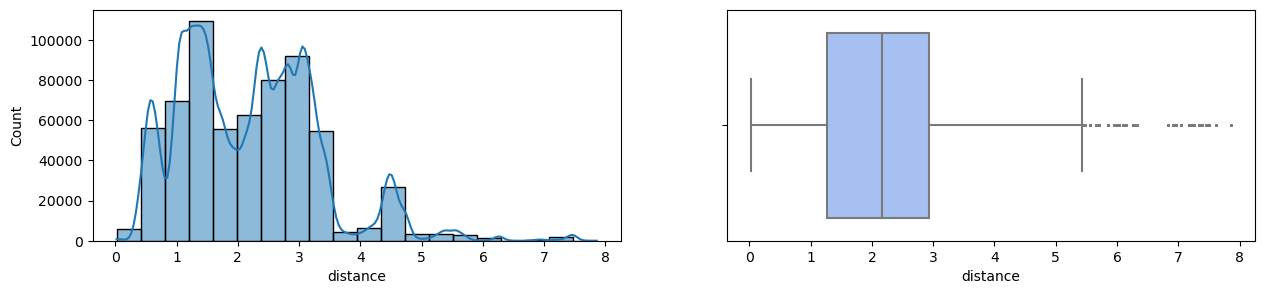

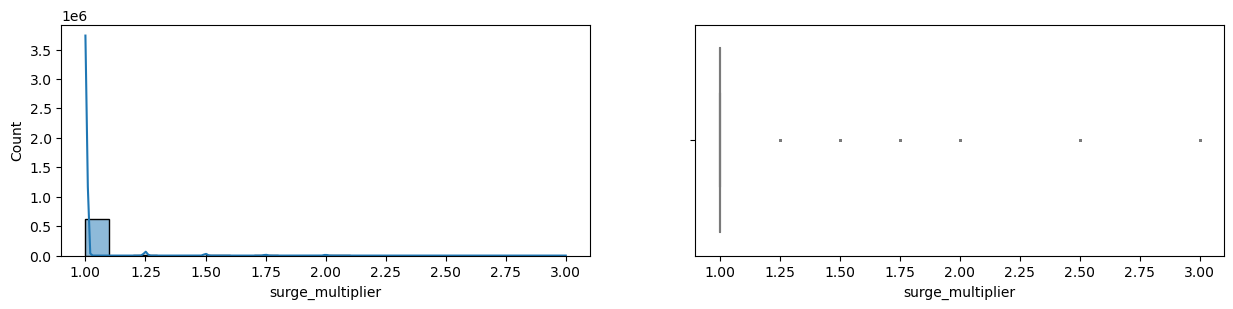

In [19]:
num_col = ['distance', 'surge_multiplier']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Outlier handling is only done in the distance column, while in the surge_multiplier column, the outlier is not handled to maintain data variation.

In [20]:
features_with_outliers = ['distance']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

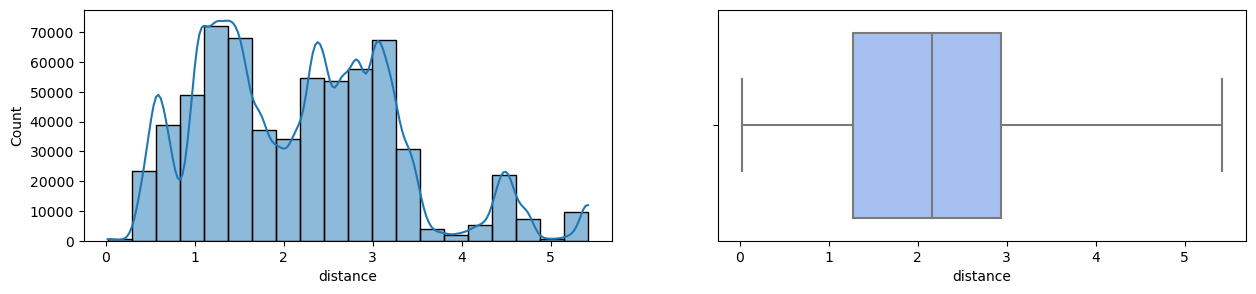

In [21]:
num_col = ['distance']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

In [22]:
df.shape

(637976, 57)

### Split dataset

In [23]:
df_inf = df.sample(10, random_state=41) # Retrieving inference data.
df_inf.reset_index(drop=True, inplace=True) # Reset indexes.

split data train and test

In [24]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=41) # split data train dan test

**The features used are the Name, Distance, and Surge Multiplier columns.**

In [25]:
X_train = df_train[['name', 'distance', 'surge_multiplier']] # feature
y_train = df_train[['price']] #target

X_test = df_test[['name', 'distance', 'surge_multiplier']]
y_test = df_test[['price']]

In [26]:
y_train

,price
392131,32.5
541078,15.0
183544,19.5
5145,6.5
673060,22.5
...,...
494149,26.0
195110,30.0
58015,7.0
400646,11.0


**separating columns of numeric and category types for easy scaling and encoding**

In [27]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f'Total num column: {len(num_cols)}')
print(f'Num column: {num_cols}') 
print(f'Total num category: {len(cat_cols)}')
print(f'Category column: {cat_cols}')

X_train_num = X_train[num_cols] 
X_train_cat = X_train[cat_cols] 

X_test_num = X_test[num_cols] 
X_test_cat = X_test[cat_cols]

Total num column: 2
Num column: Index(['distance', 'surge_multiplier'], dtype='object')
Total num category: 1
Category column: Index(['name'], dtype='object')


### Feature Scaling

In [28]:
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [29]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols) # dataframe
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols)

transform back into a dataframe 

In [30]:
X_train_num_scaled.head(2) # Dataframes X_train after scalling

,distance,surge_multiplier
0,0.063044,-0.158336
1,0.289456,-0.158336


In [31]:
X_test_num_scaled.head(2) # Dataframes X_test after scalling

,distance,surge_multiplier
0,-1.078070,-0.158336
1,-1.150522,-0.158336


### Feature Encoding

In [32]:
encoder = OneHotEncoder() # encoding categorical data

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [33]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols)) # dataframe
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

In [34]:
X_train_cat_encoded.head() # Dataframe after encoding

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Concat num and cat column

In [35]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1) # Connecting data scaling and encoding
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [36]:
X_train.head() 

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.063044,-0.158336,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.289456,-0.158336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.941522,-0.158336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.869772,-0.158336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.561852,-0.158336,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# F. Modeling

In [37]:
lr = LinearRegression() 

lr.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [38]:
y_train_pred = lr.predict(X_train) # predict train
y_test_pred = lr.predict(X_test) # predict test

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred)) # Display MAE value
print("R2 Score:",r2_score(y_train,y_train_pred)) # Display R2 Score value
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

==================== TRAINING ====================
Mean absolute error: 1.781222734757513
R2 Score: 0.9276037820786969


==================== TEST ====================
Mean absolute error: 1.7810511103976598
R2 Score: 0.9276145443151556


According to the model evaluation results, the **Linear Regression** model has an accuracy of **R2 Score 0.92** and **MAE 1.78** in the training set and **R2 Score 0.92** and **MAE 1.78** in the testing set. 

### Model Inference
Models that have been trained will be tested on data that is not included in the training or testing set.

In [39]:
df_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,ef16c764-b9fb-4d1c-a6c3-1233d46992fe,1.544828e+09,22,14,12,2018-12-14 22:50:09,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
1,08a07448-5378-44b5-9613-f485d69a42f0,1.543435e+09,19,28,11,2018-11-28 19:56:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
2,0be31d5e-27cd-42a9-8bbd-cc09025e3a64,1.543692e+09,19,1,12,2018-12-01 19:17:56,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
3,86b36d62-831d-4354-be0d-56f1ba458920,1.543780e+09,19,2,12,2018-12-02 19:53:06,America/New_York,Theatre District,Boston University,Lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
4,ee3493e3-4a2d-47f3-865c-5862a37e62b8,1.545139e+09,13,18,12,2018-12-18 13:15:11,America/New_York,Back Bay,South Station,Uber,...,0.0028,1545152400,23.05,1545192000,38.00,1545109200,11.81,1545134400,31.89,1545109200
5,f28276e2-9ff8-4f67-925a-4c784092b0b8,1.543797e+09,0,3,12,2018-12-03 00:23:00,America/New_York,Theatre District,North End,Lyft,...,0.0888,1543770000,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000
6,0f9a715b-e512-4cf3-82a1-ba4c7cd3b00b,1.543281e+09,1,27,11,2018-11-27 01:15:22,America/New_York,Northeastern University,Theatre District,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
7,b6d5e85f-d6ed-4fee-8636-a0509d8b6a2a,1.543328e+09,14,27,11,2018-11-27 14:21:23,America/New_York,South Station,Back Bay,Uber,...,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000
8,7ef42567-0d15-4283-8215-fcd74b7a0f95,1.543424e+09,16,28,11,2018-11-28 16:47:07,America/New_York,Haymarket Square,Theatre District,Lyft,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
9,edf96a7c-1880-4076-868a-ed89d747d2b1,1.543514e+09,17,29,11,2018-11-29 17:47:57,America/New_York,Fenway,Theatre District,Uber,...,0.0000,1543510800,34.83,1543550400,45.03,1543510800,30.90,1543550400,38.93,1543510800


**split inference num and categorical column**

In [40]:
inference_num = df_inf[num_cols] 
inference_cat = df_inf[cat_cols] 

**scaliing and encoding inference data**

In [41]:
inference_num_scaled = scaler.transform(inference_num) 
inference_cat_encoded = encoder.transform(inference_cat) 

**Combining transformed data with the concat function on a single dataframe**

In [42]:
inference_final = np.concatenate([inference_num_scaled, inference_cat_encoded.toarray()], axis=1) #menggabungkan data

**Predict Data Inference**

In [43]:
y_pred_inf = lr.predict(inference_final) # pred model

In [44]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Price_Predic'])

**Comparing prediction results with actual values**

In [45]:
predictions = pd.concat([df_inf['price'], y_pred_inf], axis=1) # Comparing actual and predicted values
predictions.columns = ['Price_Real', 'Price_Predic']
predictions

,Price_Real,Price_Predic
0,16.5,18.935425
1,17.0,16.884911
2,9.0,6.331131
3,42.5,39.026794
4,8.5,8.346222
5,30.0,30.299744
6,27.5,31.250214
7,10.5,13.402321
8,7.0,6.158318
9,26.0,17.190514


# Summary

It was found that, there are many factors that are felt to affect the price of this transportation mode but in reality it has no effect, for example in circumstances where the icon that is the average weather on that day, for example rain, cloudy, etc., it turns out that there is no correlation with price, then also for other columns such as temperature, evening, night, day, month, etc. does not show any correlation that can affect the price.

According to the corelation table, the factors that influence the prices of Uber and Lyft are distance, surge multiplier, and name. 

Using these three features, the model predicts using the linear regression model, yielding evaluation results of 0.93 and 1.67 in the training set and 0.92 and 1.76 in the testing set.

This model is already very good for predicting the price of Uber and Lyft trips; the error value ranges from $0.1 to $3 with minimally large error values and may still be possible with some data.
#### Translate
didapatkan bahwa, banyak sekali faktor yang dirasa berpengaruh terhadap harga pada mode tranportasi ini tetapi pada kenyataanya tidak berpengaruh, contohnya pada keadaan dimana icon yang menjadi rerata cuaca pada hari tersebut misalnya rain, cloudy, dll ternyata tidak terdapat korelasi dengan price, kemudian juga untuk kolom lainnya seperti temperature, sore hari, malam hari, day/hari, bulan, dll tidak menunjukan adanya korelasi yang dapat mempengaruhi harga.

jadi berdasarkan corelation tabel yang mempengaruhi harga uber dan lyft adalah distance/jarak, surge_multiplier/lonjakan penumpang, dan name/jenis mode transportasi.

dengan 3 feature ini kemudian model memprediksi menggunakan model LinearRegression dan didapatkan hasil evaluasi pada model yaitu **R2 Score 0.93** dan **MAE 1.67** pada training setnya dan pada testing setnya mendapat **R2 Score 0.92** dan **MAE 1.76**

model ini sudah sangat baik untuk dapat digunakan dalam memprediksi harga perjalan uber and lyft, nilai eror nya berkisar $0.1 hingga $3. dengan nilai eror besar yang minim dan mungkin masih dapat terjadi pada beberapa data.